In [46]:
import pandas as pd 
import glob
from datetime import date
from wetterdienst import Wetterdienst

# Inzidenzwerte holen

In [3]:
#Datum von heute holen
today = date.today()
print("Today's date:", today)

Today's date: 2021-03-10


In [96]:
#Wir lesen die CSV´s ein da die Api nicht immer richtig arbeitet. Vll wird dieser Fehler noch behoben???
#Außerdem werden die Zahlen manchmal rückwirkend geändert... wie weit ist die Frage, dann könnte man die Daten ablegen


download_dates = pd.date_range(start='20200402', end=today).strftime('%Y%m%d')

base_url = ("https://www.lgl.bayern.de/gesundheit/infektionsschutz/infektionskrankheiten_a_z/coronavirus/karte_coronavirus/fallzahlen_archiv/")

list_of_url = [base_url+date+str('_LK_coronazahlen.csv') for date in download_dates]

df = pd.DataFrame()

for url, date in zip(list_of_url,download_dates):
    try:
        tempdf = pd.read_csv(url, encoding='latin-1',delimiter=';',decimal=',')
        tempdf['Date'] = date
        df = pd.concat([df, tempdf])
    except:
        print(str('no data for ')+date)

no data for 20200402
no data for 20200403
no data for 20200405
no data for 20200406
no data for 20200407
no data for 20200408
no data for 20200409
no data for 20200411
no data for 20200412
no data for 20200413
no data for 20200415
no data for 20200416
no data for 20200417
no data for 20200419
no data for 20200421
no data for 20200422
no data for 20200423
no data for 20200424
no data for 20200425
no data for 20200426
no data for 20200427
no data for 20200428
no data for 20200429
no data for 20200430
no data for 20200501
no data for 20200502
no data for 20200503
no data for 20200504
no data for 20200505
no data for 20200507
no data for 20200508
no data for 20200509
no data for 20200510
no data for 20200511
no data for 20200512
no data for 20200513
no data for 20200514
no data for 20200515
no data for 20200516
no data for 20200517
no data for 20200518
no data for 20210114
no data for 20210115


In [104]:
dfnbg = df.loc[df['Regierungsbezirk Land-/Stadtkreis'] == 'SK Nürnberg']

In [105]:
dfnbg.sort_values(by=['Date'])

,Regierungsbezirk Land-/Stadtkreis,Anzahl Fälle,Änderung zum Vortag Fälle,Anzahl Todesfälle,Änderung zum Vortag Todesfälle,Population,Fälle/100.000 kumulativ,Fälle der letzten 7 Tage,7-Tages-Inzidenz,Date
87,SK Nürnberg,372,14,5,0,518365,71.76,176,33.95,20200404
87,SK Nürnberg,630,52,5,0,518365,121.54,270,52.09,20200410
87,SK Nürnberg,699,8,10,0,518365,134.85,200,38.58,20200414
87,SK Nürnberg,782,11,15,0,518365,150.86,129,24.89,20200418
87,SK Nürnberg,825,10,16,0,518365,159.15,133,25.66,20200420
...,...,...,...,...,...,...,...,...,...,...
87,SK Nürnberg,24065,51,800,3,518370,4642.44,488,94.14,20210306
87,SK Nürnberg,24144,79,800,0,518370,4657.68,427,82.37,20210307
87,SK Nürnberg,24213,69,801,1,518370,4670.99,474,91.44,20210308
87,SK Nürnberg,24252,39,801,0,518370,4678.51,488,94.14,20210309


In [106]:
dfnbg

,Regierungsbezirk Land-/Stadtkreis,Anzahl Fälle,Änderung zum Vortag Fälle,Anzahl Todesfälle,Änderung zum Vortag Todesfälle,Population,Fälle/100.000 kumulativ,Fälle der letzten 7 Tage,7-Tages-Inzidenz,Date
87,SK Nürnberg,372,14,5,0,518365,71.76,176,33.95,20200404
87,SK Nürnberg,630,52,5,0,518365,121.54,270,52.09,20200410
87,SK Nürnberg,699,8,10,0,518365,134.85,200,38.58,20200414
87,SK Nürnberg,782,11,15,0,518365,150.86,129,24.89,20200418
87,SK Nürnberg,825,10,16,0,518365,159.15,133,25.66,20200420
...,...,...,...,...,...,...,...,...,...,...
87,SK Nürnberg,24065,51,800,3,518370,4642.44,488,94.14,20210306
87,SK Nürnberg,24144,79,800,0,518370,4657.68,427,82.37,20210307
87,SK Nürnberg,24213,69,801,1,518370,4670.99,474,91.44,20210308
87,SK Nürnberg,24252,39,801,0,518370,4678.51,488,94.14,20210309


In [107]:
dfnbg = dfnbg[['Date','7-Tages-Inzidenz']]

In [108]:
dfnbg.dtypes

Date                 object
7-Tages-Inzidenz    float64
dtype: object

In [110]:
dfnbg.loc[:,'Date'] = pd.to_datetime(dfnbg['Date'], format='%Y%m%d')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [111]:
dfnbg.Date.head()

87   2020-04-04
87   2020-04-10
87   2020-04-14
87   2020-04-18
87   2020-04-20
Name: Date, dtype: datetime64[ns]

In [112]:
dfnbg.dtypes

Date                datetime64[ns]
7-Tages-Inzidenz           float64
dtype: object

<AxesSubplot:xlabel='Date'>

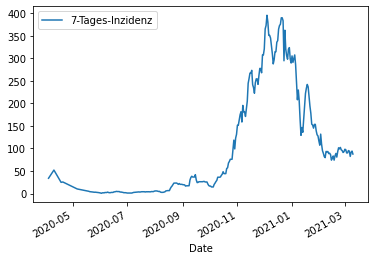

In [113]:
dfnbg.plot(x= 'Date',y='7-Tages-Inzidenz')

# Wetterdaten holen

In [56]:
API = Wetterdienst("dwd", "observation")

request = API(
    parameter=["climate_summary"],
    resolution="daily",
    start_date="2020-04-02",  # Timezone: UTC
    end_date=today,  # Timezone: UTC
    tidy_data=True,  # default
    humanize_parameters=True,  # default
 ).filter(station_id=[3668]) #Wetter für Nbg

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.


In [57]:
stations = request.df

In [58]:
values = request.values.all().df

100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


In [121]:
values.head()

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
0,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.7,10
1,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,8.2,10
2,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.2,10
3,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,13.0,10
4,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,5.7,10


In [120]:
values.PARAMETER.value_counts()

WIND_SPEED                 343
WIND_GUST_MAX              343
CLOUD_COVER_TOTAL          343
PRESSURE_AIR               343
PRECIPITATION_HEIGHT       343
PRECIPITATION_FORM         343
SUNSHINE_DURATION          343
SNOW_DEPTH                 343
TEMPERATURE_AIR_MIN_005    343
TEMPERATURE_AIR_200        343
TEMPERATURE_AIR_MIN_200    343
TEMPERATURE_AIR_MAX_200    343
HUMIDITY                   343
PRESSURE_VAPOR             343
Name: PARAMETER, dtype: int64

In [122]:
values = values.loc[values['PARAMETER'] == 'SUNSHINE_DURATION']

In [124]:
values

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
1372,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.433,3
1373,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,2.067,3
1374,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.050,3
1375,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.667,3
1376,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.700,3
...,...,...,...,...,...,...
1710,2021-03-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,11.050,1
1711,2021-03-07 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,11.100,1
1712,2021-03-08 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,0.583,1
1713,2021-03-09 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,5.450,1
